# $\Phi$-SO demo (quick SR)

In [1]:
# External packages
import numpy as np
# Internal code import
import physo

### Dataset

In [2]:
# Dataset
z = np.random.uniform(-10, 10, 50)
v = np.random.uniform(-10, 10, 50)
X = np.stack((z, v), axis=0)
y = 1.234*9.807*z + 1.234*v**2

### Running SR task

Available configurations

It should be noted that SR capabilities of `physo` are heavily dependent on hyperparameters, it is therefore recommended to tune hyperparameters to your own specific problem for doing science.
Summary of available currently configurations:

|  Config |                           Notes                           |
|:-------:|:---------------------------------------------------------:|
| config0 | Light config for demo purposes.                           |
| config1 | Tuned on a few physical cases.                            |
| config2 | [work in progress] Good starting point for doing science. |

By default, `config0` is used, however it is recommended to use the latest configuration currently available (`config1`) as a starting point for doing science.


SR task started...
=========== Epoch 00000 ===========
-> Time 2.25 s

Overall best  at R=0.498997
-> Raw expression : 
   ⎛   2          1        ⎞
-m⋅⎜- v  + ────────────────⎟
   ⎜                      2⎟
   ⎜       ⎛log(cos(1.0))⎞ ⎟
   ⎜       ⎜─────────────⎟ ⎟
   ⎝       ⎝    1.0⋅v    ⎠ ⎠

Best of epoch at R=0.498997
-> Raw expression : 
   ⎛   2          1        ⎞
-m⋅⎜- v  + ────────────────⎟
   ⎜                      2⎟
   ⎜       ⎛log(cos(1.0))⎞ ⎟
   ⎜       ⎜─────────────⎟ ⎟
   ⎝       ⎝    1.0⋅v    ⎠ ⎠


=========== Epoch 00001 ===========
-> Time 2.92 s

Overall best  at R=0.535082
-> Raw expression : 
           z           
───────────────────────
⎛         1.0         ⎞
⎜─────────────────────⎟
⎜       ⎛  1        2⎞⎟
⎜       ⎜ ──── - 1.0 ⎟⎟
⎜       ⎜ -1.0       ⎟⎟
⎝g⋅m⋅cos⎝ℯ           ⎠⎠

Best of epoch at R=0.535082
-> Raw expression : 
           z           
───────────────────────
⎛         1.0         ⎞
⎜─────────────────────⎟
⎜       ⎛  1        2⎞⎟
⎜       ⎜ ──── - 

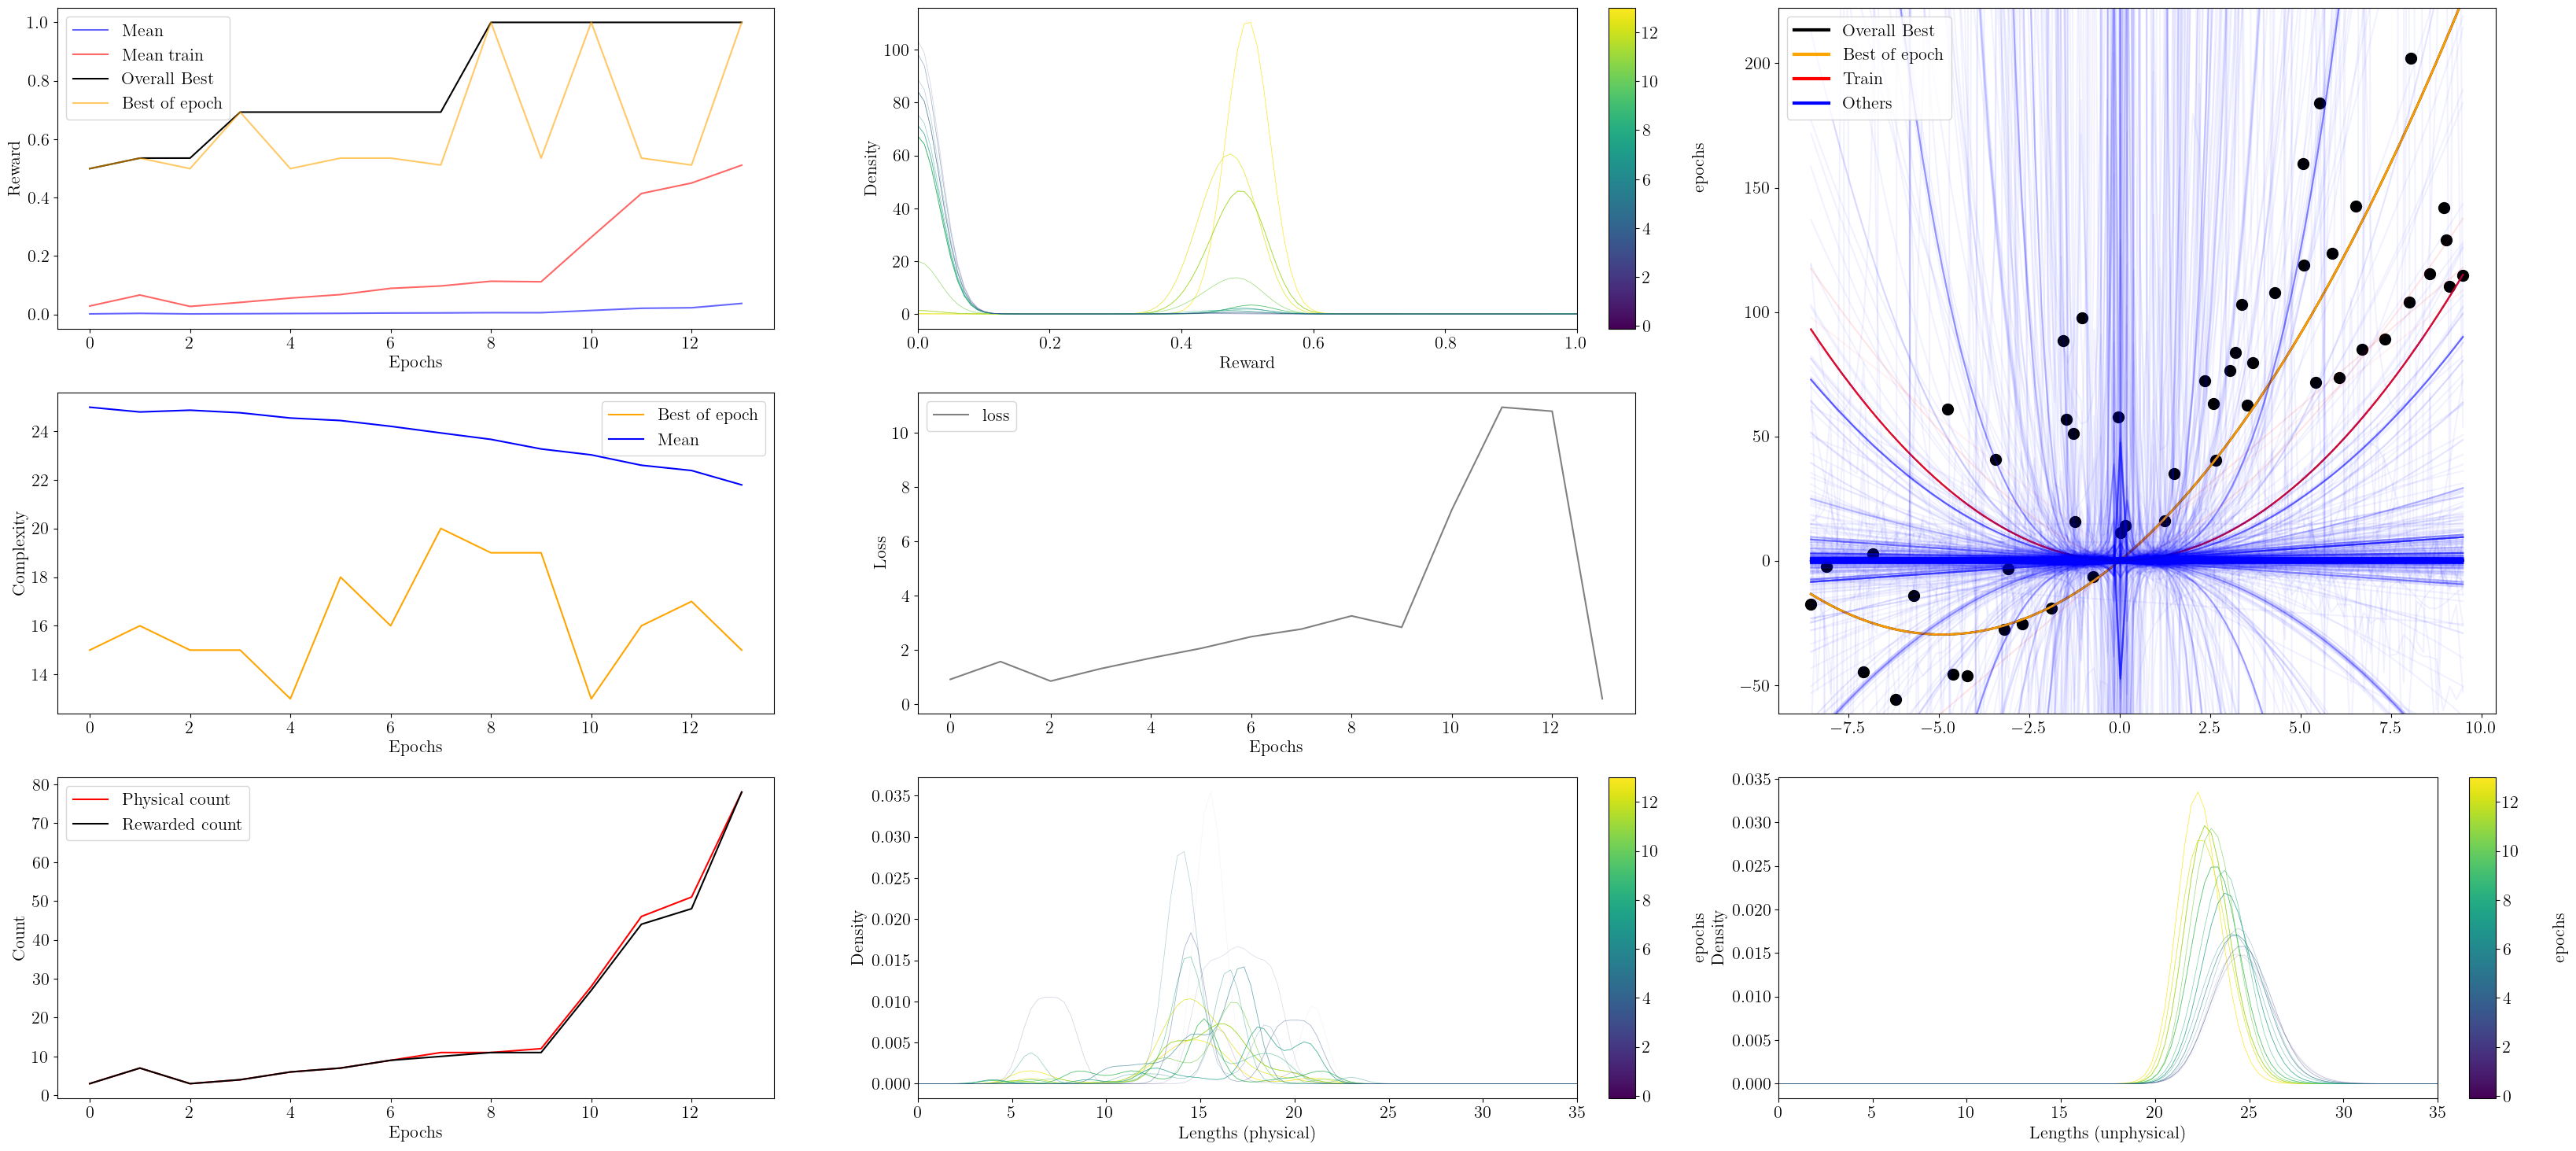

In [3]:
# Running SR task
expression, logs = physo.SR(X, y,
                            # Giving names of variables (for display purposes)
                            X_names = [ "z"       , "v"        ],
                            # Giving units of input variables
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "E",
                            # Giving units of the root variable
                            y_units = [2, -2, 1],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            # Units of fixed constants
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "m"       , "g"        ],
                            # Units offFree constants
                            free_consts_units = [ [0, 0, 1] , [1, -2, 0] ],
                            # Run config
                            run_config = physo.config.config0.config0,

)

### Inspecting the best expression found

In [4]:
# Inspecting the best expression found
# In ascii
print("\nIn ascii:")
print(expression.get_infix_pretty(do_simplify=True))
# In latex
print("\nIn latex")
print(expression.get_infix_latex(do_simplify=True))
# Free constants values
print("\nFree constants values")
print(expression.free_const_values.cpu().detach().numpy())


In ascii:
  ⎛       2⎞
m⋅⎝g⋅z + v ⎠

In latex
m \left(g z + v^{2}\right)

Free constants values
[9.80699986 1.23400002]


### Inspecting pareto front expressions

In [5]:

# Inspecting pareto front expressions
pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()
for i, prog in enumerate(pareto_front_expressions):
    # Showing expression
    print(prog.get_infix_pretty(do_simplify=True))
    # Showing free constant
    free_consts = prog.free_const_values.detach().cpu().numpy()
    for j in range (len(free_consts)):
        print("%s = %f"%(prog.library.free_const_names[j], free_consts[j]))
    # Showing RMSE
    print("RMSE = {:e}".format(pareto_front_rmse[i]))
    print("-------------\n")

   2
m⋅v 
g = 1.000000
m = 1.277626
RMSE = 6.350805e+01
-------------

g⋅m⋅z
g = 3.524520
m = 3.524520
RMSE = 5.495944e+01
-------------

  ⎛        2⎞
m⋅⎝-g⋅z + v ⎠
g = -9.806997
m = 1.234000
RMSE = 1.455278e-05
-------------

  ⎛       2⎞
m⋅⎝g⋅z + v ⎠
g = 9.807000
m = 1.234000
RMSE = 1.098475e-06
-------------

